# Generic Box
This code communicates with a component. The component was launched with the command below from the root of the repository:

```shell
$ docker run --rm -it -p 4061:8061 -v ./src/external1.py=/workspace/external.py generic
```


In [1]:
import argparse
import grpc
import io
import matplotlib.pyplot as plt
#In case of importing files from other directory
from importlib.machinery import SourceFileLoader

# add a folder to the system path
import sys
sys.path.append("../protos")
import pipeline_pb2 as vggt_pb2
import pipeline_pb2_grpc as vggt_pb2_grpc
from aux import wrap_value, unwrap_value

import PIL.Image as PIL_image
import numpy as np
import cv2
from scipy.io import loadmat,savemat


## Set parameters (GRPC) and data
Set IP and port of the service (the same used in docker run), input data (image in a matfile) and call the service

In [ ]:
from PIL import Image
import json

#target='printart.isr.ist.utl.pt:8061'
target='localhost:8061'
# List of file paths (example paths — replace with your actual ones)
file_paths = [
    'images/00.jpg',
    'images/01.jpg',
]

#list all files in a certain directory
import os
directory = "/home/manuelf/mast3r/images_in/piv"
#file_paths = [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))][0:1]

# List to hold the binary data of each image
image_byte_list = []
for path in file_paths:
    # Open the file in binary read mode ('rb') and read its entire content
    with open(path, 'rb') as f:
        image_bytes = f.read()
        image_byte_list.append(image_bytes)
        print(f"Read {path}: {len(image_bytes) / (1024 * 1024):.2f} MB")

config_json = {
    "aispgradio": {
                "command": "lang_sam",
                "parameters": {"device":"cpu"},
                "text_prompt": ["escavator. wood."]}}

print(config_json["aispgradio"]["text_prompt"])

request = vggt_pb2.Envelope(data={"images":wrap_value(image_byte_list)},
                            config_json = json.dumps(config_json))

#Para imagens muito grandes buffer grande
channel_opt = [('grpc.max_send_message_length', -1), ('grpc.max_receive_message_length', -1)]
channel=grpc.insecure_channel(target,options=channel_opt)
estimator_stub = vggt_pb2_grpc.PipelineServiceStub(channel)

Read images/00.jpg: 0.16 MB
Read images/01.jpg: 0.16 MB
Read images/01.jpg: 0.16 MB
Read images/01.jpg: 0.16 MB
Read images/01.jpg: 0.16 MB
Read images/01.jpg: 0.16 MB
Read images/01.jpg: 0.16 MB
Read images/01.jpg: 0.16 MB
Read images/01.jpg: 0.16 MB
Read images/01.jpg: 0.16 MB
['escavator. wood.']


In [63]:
#Name of the method in the service
response = estimator_stub.Process(request)
#After finishing channel.close

_InactiveRpcError: <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.UNAVAILABLE
	details = "failed to connect to all addresses; last error: UNAVAILABLE: ipv4:127.0.0.1:8061: Socket closed"
	debug_error_string = "UNKNOWN:Error received from peer  {grpc_status:14, grpc_message:"failed to connect to all addresses; last error: UNAVAILABLE: ipv4:127.0.0.1:8061: Socket closed"}"
>

In [48]:
import pickle
out_list = pickle.loads(unwrap_value(response.data["results"]))
out_list

[{'scores': array([0.81919587, 0.47244135, 0.41376182], dtype=float32),
  'boxes': array([[2.7098923e+02, 6.2261227e+01, 6.8518988e+02, 3.6562476e+02],
         [2.3139865e+02, 4.3316868e+01, 4.6269687e+02, 1.5968610e+02],
         [2.1890375e-01, 1.5845265e+02, 7.7872522e+02, 5.1878613e+02]],
        dtype=float32),
  'text_labels': ['escavator', 'wood', 'wood'],
  'labels': ['escavator', 'wood', 'wood'],
  'masks': array([[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          

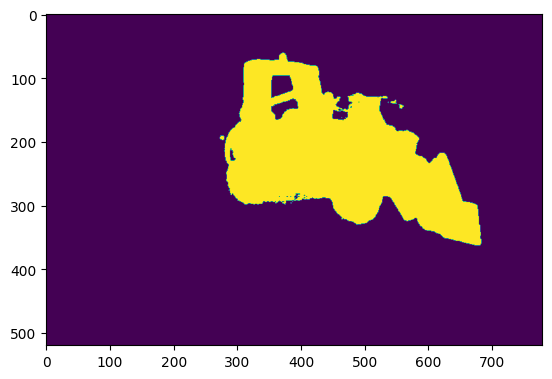

I0000 00:00:1760688343.817117   30958 chttp2_transport.cc:1336] ipv6:%5B::1%5D:8061: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {grpc_status:14, http2_error:2}


In [ ]:
plt.imshow(out_list[0]["masks"][0])